In [26]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [27]:
data = pd.read_csv('../migrations/dataset/legislationRequirement.csv')

In [28]:
scaler = MinMaxScaler()
columns_to_normalize = ['modelprice', 'electricrange']
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

data_filtered = data[(data['modelprice'] != 0) & (data['electricrange'] != 0)][['modelprice', 'electricrange']]

In [29]:
n_clusters = 31 
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto').fit(data_filtered)

In [30]:
data['cluster'] = kmeans.predict(data[['modelprice', 'electricrange']])

In [31]:
for cluster_id in range(n_clusters):
    cluster_center = kmeans.cluster_centers_[cluster_id]
    mask = data['cluster'] == cluster_id
    data.loc[mask, 'modelprice'] = cluster_center[0]
    data.loc[mask, 'electricrange'] = cluster_center[1]

#data = data.drop('cluster', axis=1)

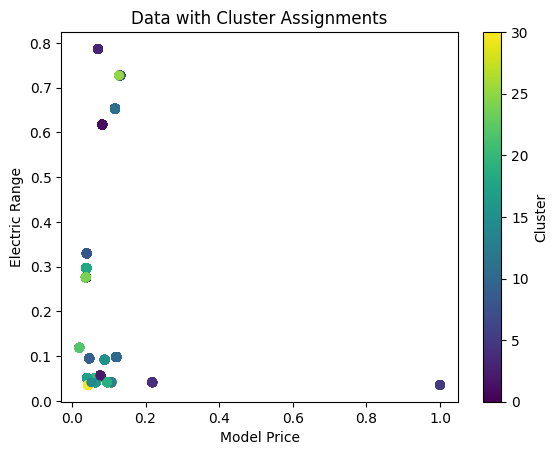

In [32]:
plt.scatter(data['modelprice'], data['electricrange'], c=data['cluster'], cmap='viridis')
plt.xlabel('Model Price')
plt.ylabel('Electric Range')
plt.title('Data with Cluster Assignments')
plt.colorbar(label='Cluster')
plt.show()

In [33]:
csv_filename = 'clusteredLegislationRequirement.csv'

data.to_csv(csv_filename, index=False)